<a href="https://colab.research.google.com/github/ArunAravind2001/Local_LLM_on_Custom_Data/blob/main/Local_LLM_created_using_our_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install required package if not already installed
!pip install PyMuPDF

# Import necessary libraries
import fitz  # PyMuPDF
from tqdm.auto import tqdm

def text_formatter(text: str) -> str:
    # Replace multiple spaces and newlines with single space
    cleaned_text = ' '.join(text.split())

    # Handle currency and number formatting
    cleaned_text = cleaned_text.replace("USD $", "USD$")
    cleaned_text = cleaned_text.replace("£ ", "£")

    # Remove unnecessary whitespace around punctuation
    cleaned_text = cleaned_text.replace(" .", ".")
    cleaned_text = cleaned_text.replace(" ,", ",")

    return cleaned_text.strip()

def process_pdf(pdf_path: str) -> list[dict]:
    # Open the PDF
    doc = fitz.open(pdf_path)
    articles = []

    # Process each page
    for page_number in tqdm(range(len(doc)), desc="Processing PDF pages"):
        page = doc[page_number]
        text = page.get_text()

        # Clean and format the text
        cleaned_text = text_formatter(text)

        # Create page data dictionary
        page_data = {
            "page_number": page_number + 1,
            "text": cleaned_text,
            "char_count": len(cleaned_text),
            "word_count": len(cleaned_text.split()),
            "sentence_count": len(cleaned_text.split(".")),
            "estimated_tokens": len(cleaned_text) // 4
        }

        articles.append(page_data)

    # Close the PDF
    doc.close()
    return articles

# Main execution
pdf_path = "/content/Article_1 (10 files merged).pdf"  # Your PDF path

# Process the PDF
try:
    processed_pages = process_pdf(pdf_path)

    # Print summary
    print(f"\nProcessed {len(processed_pages)} pages")
    for page in processed_pages:
        print(f"\nPage {page['page_number']}:")
        print(f"Word count: {page['word_count']}")
        print(f"Character count: {page['char_count']}")
        print(f"Estimated tokens: {page['estimated_tokens']}")
        print(f"First 100 characters: {page['text'][:100]}...")

except Exception as e:
    print(f"Error processing PDF: {str(e)}")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.8/19.8 MB 70.1 MB/s eta 0:00:00


Processing PDF pages:   0%|          | 0/12 [00:00<?, ?it/s]


Processed 12 pages

Page 1:
Word count: 210
Character count: 1466
Estimated tokens: 366
First 100 characters: Vyntelligence, a London, UK-based provider of mobile video and AI-first solutions for field workflow...

Page 2:
Word count: 213
Character count: 1583
Estimated tokens: 395
First 100 characters: Epitopea, a Cambridge, UK- and Montreal, Canada-based cancer immunotherapeutics company, raised USD$...

Page 3:
Word count: 136
Character count: 847
Estimated tokens: 211
First 100 characters: Genie AI, a London, UK-based AI legal editor, raised £13.3M in Series A funding. The round, which br...

Page 4:
Word count: 154
Character count: 1071
Estimated tokens: 267
First 100 characters: Garmin(NYSE: GRMN) acquired Lumishore, a Swansea, UK-based company that designs and manufactures hig...

Page 5:
Word count: 393
Character count: 2746
Estimated tokens: 686
First 100 characters: London, United Kingdom, October 22nd, 2024, Chainwire Aventus, a leading provider of enterprise bloc...

Page 

In [2]:
import random

random_samples = random.sample(processed_pages, k=3)
print("\nRandom Samples:")
for i, sample in enumerate(random_samples, 1):
    print(f"\nSample {i} (Page {sample['page_number']}):")
    print(f"Word count: {sample['word_count']}")
    print(f"Character count: {sample['char_count']}")
    print(f"Estimated tokens: {sample['estimated_tokens']}")
    print(f"First 100 characters: {sample['text'][:100]}...")



Random Samples:

Sample 1 (Page 8):
Word count: 364
Character count: 2419
Estimated tokens: 604
First 100 characters: Tide, a London, UK-based business financial platform, acquired Onfolk, a UK SME payroll solution, wi...

Sample 2 (Page 1):
Word count: 210
Character count: 1466
Estimated tokens: 366
First 100 characters: Vyntelligence, a London, UK-based provider of mobile video and AI-first solutions for field workflow...

Sample 3 (Page 5):
Word count: 393
Character count: 2746
Estimated tokens: 686
First 100 characters: London, United Kingdom, October 22nd, 2024, Chainwire Aventus, a leading provider of enterprise bloc...


In [3]:
import pandas as pd

df=pd.DataFrame(processed_pages)
df.head()


,page_number,text,char_count,word_count,sentence_count,estimated_tokens
0,1,"Vyntelligence, a London, UK-based provider of ...",1466,210,9,366
1,2,"Epitopea, a Cambridge, UK- and Montreal, Canad...",1583,213,12,395
2,3,"Genie AI, a London, UK-based AI legal editor, ...",847,136,7,211
3,4,"Garmin(NYSE: GRMN) acquired Lumishore, a Swans...",1071,154,10,267
4,5,"London, United Kingdom, October 22nd, 2024, Ch...",2746,393,17,686


In [4]:
df.describe().round(2)

,page_number,char_count,word_count,sentence_count,estimated_tokens
count,12.00,12.00,12.00,12.00,12.00
mean,6.50,1525.92,221.42,11.92,380.92
std,3.61,860.88,126.19,5.16,215.29
min,1.00,250.00,30.00,6.00,62.00
25%,3.75,944.50,144.25,7.75,235.75
50%,6.50,1268.50,182.00,10.00,316.50
75%,9.25,2224.00,340.00,17.25,555.25
max,12.00,2972.00,422.00,20.00,743.00


In [5]:
##TExt pre processing of chunks of 10 sentences
##using spacy

In [6]:
!pip install spacy

In [7]:
from spacy.lang.en import English

nlp = English()

# Creating pipeline
nlp.add_pipe("sentencizer")

# Create document instance as an example
doc = nlp("This is a sentence. This is another sentence. I am Arun.")
assert len(list(doc.sents)) == 3

# Print each sentence
for sent in doc.sents:
    print(sent.text)


This is a sentence.
This is another sentence.
I am Arun.


In [8]:
processed_pages[3]

{'page_number': 4,
 'text': 'Garmin(NYSE: GRMN) acquired Lumishore, a Swansea, UK-based company that designs and manufactures high-performance above and underwater LED lighting systems for boats. The amount of the deal was not disclosed. With the acquisition, Garmin will expand its solutions all around the vessel. A vertically integrated company with in-house R&D and production, its associates will become part of the global Garmin workforce. Led byEifrion Evans, Founder and CEO, Lumishore is a vertically integrated company which specializes in LED lighting, with in-house R&D and production, used on a variety of vessels from runabouts to superyachts. The company offers a comprehensive range of single, dual and full-color change underwater and above-water lighting systems. Lumishore also has a distribution center in Sarasota, Fla. Garmin provides products that improve the aviation, automotive, fitness, marine and outdoor markets. The company is incorporated in Switzerland, and its princi

In [9]:
for item in tqdm(processed_pages):
  item["sentences"]=list(nlp(item["text"]).sents)

#check all sentences are strings

item["sentences"]= [str(sentences) for sentences in item["sentences"]]

item["pages_sentence_count_spacy"]=len(item["sentences"])

  0%|          | 0/12 [00:00<?, ?it/s]

In [10]:
random.sample(processed_pages, k=1)

[{'page_number': 1,
  'text': 'Vyntelligence, a London, UK-based provider of mobile video and AI-first solutions for field workflows and customer experiences, raised growth funding from Octopus Ventures. The amount of the deal was not disclosed. The company intends to use the funds for growth in the UK, Europe and the USA. Led by CEO Kapil Singhal, Vyntelligence enables users to capture complex information in the field (surveys, reports, inspections, issues, claims) as short video data, asynchronously, replacing form filling and calls. Its automated Gen AI and computer vision powered labelling and recommendations extract value from this video data by predicting next best actions, flagging potential risks early to accelerate infrastructure deployment and improve customer response time by eliminating unnecessary site visits and unplanned works. specializes in accelerating transformation with mobile video and AI-first solutions for field workflows and customer experiences for companies in

In [11]:
df =pd.DataFrame(processed_pages)
df.describe().round(2)

,page_number,char_count,word_count,sentence_count,estimated_tokens,pages_sentence_count_spacy
count,12.00,12.00,12.00,12.00,12.00,1.0
mean,6.50,1525.92,221.42,11.92,380.92,15.0
std,3.61,860.88,126.19,5.16,215.29,NaN
min,1.00,250.00,30.00,6.00,62.00,15.0
25%,3.75,944.50,144.25,7.75,235.75,15.0
50%,6.50,1268.50,182.00,10.00,316.50,15.0
75%,9.25,2224.00,340.00,17.25,555.25,15.0
max,12.00,2972.00,422.00,20.00,743.00,15.0


In [12]:
chunk_size = 10

# Create a function to split lists of text recursively into chunks
def split_list(input_list, chunk_size):
    # Base case: if list length is less than or equal to chunk size, return it as is
    if len(input_list) <= chunk_size:
        return [input_list]
    else:
        # Recursively split the list
        return [input_list[:chunk_size]] + split_list(input_list[chunk_size:], chunk_size)

# Test the function
test_list = list(range(25))
result = split_list(test_list, chunk_size)
print(result)


[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [10, 11, 12, 13, 14, 15, 16, 17, 18, 19], [20, 21, 22, 23, 24]]


In [13]:
#loop through pages and texts and split sentences into chunks

for item in tqdm(processed_pages):
  item["chunks"]=split_list(item["sentences"],chunk_size)
  item["pages_chunk_count"]=len(item["chunks"])

  0%|          | 0/12 [00:00<?, ?it/s]

In [14]:
random.sample(processed_pages, k=1)

[{'page_number': 1,
  'text': 'Vyntelligence, a London, UK-based provider of mobile video and AI-first solutions for field workflows and customer experiences, raised growth funding from Octopus Ventures. The amount of the deal was not disclosed. The company intends to use the funds for growth in the UK, Europe and the USA. Led by CEO Kapil Singhal, Vyntelligence enables users to capture complex information in the field (surveys, reports, inspections, issues, claims) as short video data, asynchronously, replacing form filling and calls. Its automated Gen AI and computer vision powered labelling and recommendations extract value from this video data by predicting next best actions, flagging potential risks early to accelerate infrastructure deployment and improve customer response time by eliminating unnecessary site visits and unplanned works. specializes in accelerating transformation with mobile video and AI-first solutions for field workflows and customer experiences for companies in

In [15]:
df = pd.DataFrame(processed_pages)
df.describe().round(2)

,page_number,char_count,word_count,sentence_count,estimated_tokens,pages_chunk_count,pages_sentence_count_spacy
count,12.00,12.00,12.00,12.00,12.00,12.00,1.0
mean,6.50,1525.92,221.42,11.92,380.92,1.33,15.0
std,3.61,860.88,126.19,5.16,215.29,0.49,NaN
min,1.00,250.00,30.00,6.00,62.00,1.00,15.0
25%,3.75,944.50,144.25,7.75,235.75,1.00,15.0
50%,6.50,1268.50,182.00,10.00,316.50,1.00,15.0
75%,9.25,2224.00,340.00,17.25,555.25,2.00,15.0
max,12.00,2972.00,422.00,20.00,743.00,2.00,15.0


In [16]:
from tqdm import tqdm  # Import tqdm for the progress bar
import re

pages_and_chunks = []

# Loop through each processed page
for item in tqdm(processed_pages):
    for sentence_chunk in item["chunks"]:
        # Create a dictionary for each chunk
        chunk_dict = {}
        chunk_dict["page_number"] = item["page_number"]

        # Convert each Span in the sentence_chunk to a string, then join them
        joined_sentence_chunk = " ".join([str(sent) for sent in sentence_chunk]).strip()

        # Add a space after periods followed by an uppercase letter
        joined_sentence_chunk = re.sub(r'\.([A-Z])', r'. \1', joined_sentence_chunk)

        chunk_dict["sentence_chunk"] = joined_sentence_chunk
        chunk_dict["sentence_chunk_length"] = len(joined_sentence_chunk)
        chunk_dict["sentence_chunk_word_count"] = len(joined_sentence_chunk.split())
        chunk_dict["chunk_token_count"] = len(joined_sentence_chunk) / 4  # Rough token estimate

        # Append to the list of pages and chunks
        pages_and_chunks.append(chunk_dict)

# Print the length of pages_and_chunks list
print(len(pages_and_chunks))


100%|██████████| 12/12 [00:00<00:00, 1333.85it/s]

16


In [17]:
random.sample(pages_and_chunks, k=1)

[{'page_number': 10,
  'sentence_chunk': 'Hong Kong, Singapore, London, and Dubai, Global, October 22nd, 2024, Chainwire Scroll, the leading zero-knowledge rollup for Ethereum, announced the launch of its native token, $SCR today. With the introduction of $SCR, Scroll recognizes its global community of contributors for their ongoing support and aims to provide everyone, everywhere with opportunities to participate in the decentralized future of Scroll. $SCR will be distributed to Scroll contributors through thoughtfully designed allocations to maximize impact in creating opportunities for a decentralized global community. Initial distribution of $SCR will include an airdrop to participants who contributed to onchain activities, projects that have built on Scroll, industry contributors (such as technical contributors, zero-knowledge researchers, open-source developers, public goods organizations, and educational data providers) as well as broader global community organizers, hackathon w

In [18]:
df= pd.DataFrame(pages_and_chunks)
df.describe().round(2)

,page_number,sentence_chunk_length,sentence_chunk_word_count,chunk_token_count
count,16.00,16.00,16.00,16.00
mean,7.06,1144.50,166.38,286.12
std,3.51,523.86,75.90,130.96
min,1.00,250.00,30.00,62.50
25%,4.75,843.00,131.00,210.75
50%,7.50,1030.50,153.50,257.62
75%,10.00,1453.25,211.00,363.31
max,12.00,2274.00,332.00,568.50


In [19]:
min_token_length = 30

# Filter the DataFrame
filtered_df = df[df["chunk_token_count"] <= min_token_length]

# Check if there are at least 5 rows to sample
sample_size = min(5, len(filtered_df))  # Take the smaller of 5 or the number of available rows

for row in filtered_df.sample(sample_size).iterrows():
    print(f"chunk_token_count: {row[1]['chunk_token_count']}")
    print(f"sentence_chunk: {row[1]['sentence_chunk']}")


In [20]:
!pip install sentence-transformers

from sentence_transformers import SentenceTransformer

# Initialize the model
model = SentenceTransformer('sentence-transformers/all-mpnet-base-v2', device="cuda")

# Create a list of sentences
sentences = [
    "The sentence transformer library provides an easy way to create embeddings",
    "Sentences can be embedded one by one or in a list",
    "I like horses!"
]

# Encode/embed the sentences
embeddings = model.encode(sentences)
embeddings_dict = dict(zip(sentences, embeddings))

# Print each sentence with its embedding
for sentence, embedding in embeddings_dict.items():
    print(f"Sentence: {sentence}")
    print(f"Embedding: {embedding}")
    print(" ")


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Sentence: The sentence transformer library provides an easy way to create embeddings
Embedding: [-3.17512490e-02  3.37268040e-02 -2.52437722e-02  5.22287600e-02
 -2.35248990e-02 -6.19117822e-03  1.35026304e-02 -6.25500977e-02
  7.50825973e-03 -2.29684655e-02  2.98146568e-02  4.57555018e-02
 -3.26700397e-02  1.39847072e-02  4.18013781e-02 -5.92969656e-02
  4.26309630e-02  5.04660420e-03 -2.44552195e-02  3.98594327e-03
  3.55897769e-02  2.78742891e-02  1.84098352e-02  3.67700234e-02
 -2.29960773e-02 -3.01797111e-02  5.99519233e-04 -3.64503972e-02
  5.69104478e-02 -7.49943079e-03 -3.70004289e-02 -3.04357079e-03
  4.64354567e-02  2.36151041e-03  9.06849777e-07  7.00035319e-03
 -3.92290056e-02 -5.95698599e-03  1.38653032e-02  1.87109259e-03
  5.34202382e-02 -6.18613847e-02  2.19613388e-02  4.86051142e-02
 -4.25697900e-02 -1.69858765e-02  5.04178703e-02  1.54733742e-02
  8.12859610e-02  5.07106222e-02 -2.27497090e-02 -4.35721166e-02
 -2.18389230e-03 -2.14091521e-02 -2.01758128e-02  3.0683251

In [21]:
embeddings[0].shape

(768,)

In [22]:
from tqdm import tqdm

# Move the model to GPU (if not already specified in initialization)
model.to("cuda")

# Encode each sentence chunk and add the embedding to the dictionary
for item in tqdm(pages_and_chunks):
    item["embedding"] = model.encode(item["sentence_chunk"])


100%|██████████| 16/16 [00:00<00:00, 38.33it/s]


In [23]:
## save embedding to file
text_chunks_and_embeddings_df=pd.DataFrame(pages_and_chunks)
embeddings_df_Save_path="/content/embeddings_df.csv"
text_chunks_and_embeddings_df.to_csv(embeddings_df_Save_path,index=False)

In [24]:
# import saved file and view

text_chunks_and_embeddings_df=pd.read_csv(embeddings_df_Save_path)
text_chunks_and_embeddings_df.head()

,page_number,sentence_chunk,sentence_chunk_length,sentence_chunk_word_count,chunk_token_count,embedding
0,1,"Vyntelligence, a London, UK-based provider of ...",1466,210,366.50,[ 1.81625467e-02 2.88233738e-02 -2.99445093e-...
1,2,"Epitopea, a Cambridge, UK- and Montreal, Canad...",1584,214,396.00,[ 5.36617972e-02 6.95513338e-02 -1.78649067e-...
2,3,"Genie AI, a London, UK-based AI legal editor, ...",847,136,211.75,[ 7.41840005e-02 7.97738060e-02 -1.78234205e-...
3,4,"Garmin(NYSE: GRMN) acquired Lumishore, a Swans...",1071,154,267.75,[ 4.00057435e-02 -3.90397161e-02 -3.01220957e-...
4,5,"London, United Kingdom, October 22nd, 2024, Ch...",2274,332,568.50,[ 3.93952318e-02 8.64965189e-03 -2.74339281e-...


In [25]:
##RAG search and answer

##similarity search

import random
import torch
import numpy as np
import pandas as pd

device= "cuda"

text_chunks_and_embeddings_df= pd.read_csv(embeddings_df_Save_path)
#convert texts and embeddings df to list of dicts

text_chunks_and_embeddings_df["embedding"]=text_chunks_and_embeddings_df["embedding"].apply(lambda x: np.fromstring(x.strip("[]"), sep=" "))
#converting our embeddings into torch.tensor
embeddings=torch.tensor(np.stack(text_chunks_and_embeddings_df["embedding"].to_list(),axis=0)).to(device)

pages_and_chunks=text_chunks_and_embeddings_df.to_dict(orient="records")

text_chunks_and_embeddings_df

,page_number,sentence_chunk,sentence_chunk_length,sentence_chunk_word_count,chunk_token_count,embedding
0,1,"Vyntelligence, a London, UK-based provider of ...",1466,210,366.50,"[0.0181625467, 0.0288233738, -0.0299445093, -0..."
1,2,"Epitopea, a Cambridge, UK- and Montreal, Canad...",1584,214,396.00,"[0.0536617972, 0.0695513338, -0.00178649067, 0..."
2,3,"Genie AI, a London, UK-based AI legal editor, ...",847,136,211.75,"[0.0741840005, 0.079773806, -0.0178234205, -0...."
3,4,"Garmin(NYSE: GRMN) acquired Lumishore, a Swans...",1071,154,267.75,"[0.0400057435, -0.0390397161, -0.0301220957, 0..."
4,5,"London, United Kingdom, October 22nd, 2024, Ch...",2274,332,568.50,"[0.0393952318, 0.00864965189, -0.0274339281, -..."
5,5,The updated network will provide enhanced func...,471,61,117.75,"[0.0336340442, -0.0119362706, -0.0254711136, 0..."
6,6,"product authentication. Founded in 2020, Avent...",831,103,207.75,"[0.0366796069, -0.00884273462, -0.0105938865, ..."
7,7,"Vortexa, a London, UK-based provider of real-t...",990,147,247.50,"[0.000448989624, 0.0527656525, -0.0538663752, ..."
8,8,"Tide, a London, UK-based business financial pl...",1134,164,283.50,"[0.00624732487, -0.0127001256, -0.0304584093, ..."
9,8,"As part of the acquisition, the Onfolk team wi...",1284,200,321.00,"[0.0379529223, 0.00373792881, -0.0300712679, -..."


In [26]:
embeddings.shape

torch.Size([16, 768])

In [27]:
# create model

from sentence_transformers import util, SentenceTransformer

embedding_model = SentenceTransformer(model_name_or_path="sentence-transformers/all-mpnet-base-v2", device=device)

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [28]:
!pip install sentence-transformers
import time
import torch
from sentence_transformers import SentenceTransformer, util

# Initialize the model
model = SentenceTransformer('sentence-transformers/all-mpnet-base-v2', device="cuda")

# 1. Define the query
query = "LinkedInandTelegram"
print(f"Query: {query}")

# 2. Embed the query
query_embedding = model.encode(query, convert_to_tensor=True)

# Assume embeddings is a tensor of your previously encoded passages
embeddings = model.encode([item["sentence_chunk"] for item in pages_and_chunks], convert_to_tensor=True)

# 3. Get similarity score with the dot product
start_time = time.time()
dot_scores = util.dot_score(query_embedding, embeddings)[0]
end_time = time.time()

# Print time taken
print(f"Time taken: {end_time - start_time} seconds")

# 4. Get the top-k results (in this case k=5)
top_k = 5
top_results_dot_product = torch.topk(dot_scores, k=top_k)

print("Top-k Results (Dot Product):")
for score, idx in zip(top_results_dot_product.values, top_results_dot_product.indices):
    print(f"Score: {score:.4f}, Chunk: {pages_and_chunks[idx]['sentence_chunk']}")


Query: LinkedInandTelegram
Time taken: 0.007108449935913086 seconds
Top-k Results (Dot Product):
Score: 0.1225, Chunk: About $BORED $BORED is the premier meme coin on ApeChain, inspired by the iconic Bored Ape Yacht Club (BAYC) and designed to capture the fun, irreverence, and community spirit of the digital age. Launched on ApeExpress, $BORED combines the power of memes with the scalability and speed of ApeChain, creating a token that is as easy to trade as it is to enjoy. About ApeExpress ApeExpress is a newly launched platform within the ApeChain ecosystem that allows users to quickly create and launch custom tokens. ApeChain is part of the Yuga Labs ecosystem, which is widely recognized for its influence in the NFT and Web3 space, particularly through projects like the Bored Ape Yacht Club. BOREDpr@boredonape.com
Score: 0.1135, Chunk: London, UK, October 21st, 2024, Chainwire ApeExpress has officially launched on ApeChain, offering a streamlined platform for users to create and dep

In [29]:
import time
# 1. Define the query
query = "Vyntelligence"
print(f"Query: {query}")

# 2. Embed the query
# Note: it's important to embed your query with the same model you embedded your passage
query_embedding = embedding_model.encode(query, convert_to_tensor=True)

# 3. Get similarity score with the dot product (use cosine similarity if outputs of model aren’t normalized)
start_time = time.time()
dot_scores = util.dot_score(query_embedding, embeddings)[0]
end_time = time.time()

# Print time taken
print(f"Time taken: {end_time - start_time} seconds")

# 4. Get the top-k results (in this case k=5)
top_results_dot_product = torch.topk(dot_scores, k=5)
top_results_dot_product


Query: Vyntelligence
Time taken: 0.00027060508728027344 seconds


torch.return_types.topk(
values=tensor([0.4799, 0.2939, 0.2900, 0.2857, 0.2659], device='cuda:0'),
indices=tensor([0, 6, 4, 5, 7], device='cuda:0'))

In [30]:
import textwrap

def print_wrapped(text, width=80):
    wrapped_text = textwrap.wrap(text, width=width)
    for line in wrapped_text:
        print(line)

In [31]:
print(f"Query: {query}")
print("results:")

for score,idx in zip(top_results_dot_product.values, top_results_dot_product[1]):
  print(f"Score: {score:.4f}")
  print_wrapped(pages_and_chunks[idx]["sentence_chunk"])
  print(f"Page: {pages_and_chunks[idx]['page_number']}")
  print("\n")


Query: Vyntelligence
results:
Score: 0.4799
Vyntelligence, a London, UK-based provider of mobile video and AI-first
solutions for field workflows and customer experiences, raised growth funding
from Octopus Ventures. The amount of the deal was not disclosed. The company
intends to use the funds for growth in the UK, Europe and the USA. Led by CEO
Kapil Singhal, Vyntelligence enables users to capture complex information in the
field (surveys, reports, inspections, issues, claims) as short video data,
asynchronously, replacing form filling and calls. Its automated Gen AI and
computer vision powered labelling and recommendations extract value from this
video data by predicting next best actions, flagging potential risks early to
accelerate infrastructure deployment and improve customer response time by
eliminating unnecessary site visits and unplanned works. specializes in
accelerating transformation with mobile video and AI-first solutions for field
workflows and customer experiences for

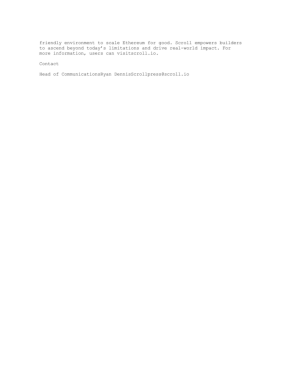

In [32]:
import fitz
pdf_path = "/content/Article_1 (10 files merged).pdf"
doc = fitz.open(pdf_path)
page=doc.load_page(10)

img= page.get_pixmap(dpi=450)
doc.close()

img_array= np.frombuffer(img.samples, dtype=np.uint8).reshape(img.h, img.w, img.n)

import matplotlib.pyplot as plt
plt.imshow(img_array)
plt.axis('off')
plt.show()

In [33]:
from sentence_transformers import SentenceTransformer, util
import torch
import time

def retrieve_relevant_resources(query: str,
                                embeddings: torch.Tensor,
                                model: SentenceTransformer = None,
                                n_resources_to_return: int = 5,
                                print_time: bool = True):
    """
    Retrieve relevant resources for a given query using dot product similarity.
    """
    # Use a default model if none is provided
    if model is None:
        model = SentenceTransformer('sentence-transformers/all-mpnet-base-v2', device="cuda")

    # Embed the query
    query_embedding = model.encode(query, convert_to_tensor=True)

    # Get dot product scores
    start_time = time.time()
    dot_scores = util.dot_score(query_embedding, embeddings)[0]
    end_time = time.time()

    # Print time taken
    if print_time:
        print(f"Time taken: {end_time - start_time} seconds")

    # Retrieve top-k scores and indices
    scores, indices = torch.topk(dot_scores, k=n_resources_to_return)
    return scores, indices

def print_top_results_and_scores(query: str,
                                  embeddings: torch.Tensor,
                                  pages_and_chunks: list,
                                  n_resources_to_return: int = 5):
    """
    Print the top results and their scores.
    """
    scores, indices = retrieve_relevant_resources(query, embeddings, n_resources_to_return=n_resources_to_return)

    for score, idx in zip(scores, indices):
        print(f"Score: {score:.4f}")
        print_wrapped(pages_and_chunks[idx]["sentence_chunk"])
        print(f"Page: {pages_and_chunks[idx]['page_number']}")
        print("\n")


In [34]:
# Define your query
query = "Aventus"

# Retrieve relevant resources and print scores and top results
scores, indices = retrieve_relevant_resources(query=query, embeddings=embeddings)
print_top_results_and_scores(query=query, embeddings=embeddings, pages_and_chunks=pages_and_chunks)


Time taken: 9.560585021972656e-05 seconds
Time taken: 9.012222290039062e-05 seconds
Score: 0.4641
The updated network will provide enhanced functionality and improved user
experiences, positioning the Aventus Network as a trusted leader in enterprise
blockchain solutions and key contributor to enterprise use cases within the
Polkadot ecosystem. About Aventus Aventustransforms how customers create trust
and unlock growth, crafting pioneering Web3 solutions for brands, from creating
more connected, integrated experiences to enhancing traceability, transparency,
and
Page: 5


Score: 0.4635
product authentication. Founded in 2020, Aventus is the only trusted digital
product extension platform that provides a secure and reliable Web3 environment
for customers to launch market-leading programs and product activations. With
deep industry expertise and a strong understanding of enterprise needs, Aventus
delivers one the best feature sets of Web3 with the familiarity of Web2, driving
significan

In [35]:
## getting an LLm for local generation
# we can load LLm locally using hugging face transformers
!pip install

import torch
from transformers import AutoTokenizer, AutoModelForCausalLM
from transformers.utils import is_flash_attn_2_available

#create quantization for smaller model loading
from transformers import BitsAndBytesConfig
quantization_config = BitsAndBytesConfig(load_in_4bit=True,
                                         bnb_4bit_compute_dtype=torch.float16)

if(is_flash_attn_2_available()) and (torch.cuda.get_device_capability()[0] >= 8):
  attn_implementation="flash_attention_2"
else:
  attn_implementation="sdpa"
print(f"attn_implementation: {attn_implementation}")


#2 Pick the model wed like to use(this will depend on how much GPU memory you have)

model_id="mistralai/Mistral-7B-Instruct-v0.1"
print(f"model_id: {model_id}")

#3 initiate tokenizer
tokenizer = AutoTokenizer.from_pretrained(model_id)

#4. Instantitate the model
llm_model = AutoModelForCausalLM.from_pretrained(model_id,
                                                  torch_dtype=torch.float16,
                                                  quantization_config=quantization_config if use_quantization else None,
                                                  low_cpu_mem_usage=False,
                                                  attn_implementation=attn_implementation)
if not use_quantization_config:
  llm_model.to("cuda")


ERROR: You must give at least one requirement to install (see "pip help install")


PackageNotFoundError: No package metadata was found for bitsandbytes

In [2]:
# First, remove the existing flash-attention directory
!rm -rf /content/flash-attention

# Clear pip cache
!pip cache purge

# Install pre-requisites
!pip install packaging ninja

# Try installing a specific version known to work with Colab
!pip install flash-attn==2.3.3 --no-build-isolation

shell-init: error retrieving current directory: getcwd: cannot access parent directories: No such file or directory
The folder you are executing pip from can no longer be found.
shell-init: error retrieving current directory: getcwd: cannot access parent directories: No such file or directory
The folder you are executing pip from can no longer be found.
shell-init: error retrieving current directory: getcwd: cannot access parent directories: No such file or directory
The folder you are executing pip from can no longer be found.


In [36]:
!pip install flash-attn --no-build-isolation

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 31.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for flash-attn
  Running setup.py clean for flash-attn
Failed to build flash-attn
ERROR: ERROR: Failed to build installable wheels for some pyproject.toml based projects (flash-attn)


In [1]:
# Install required packages
!pip install -q transformers
!pip install -q accelerate
!pip install -q bitsandbytes

import torch
from transformers import AutoTokenizer, AutoModelForCausalLM
from transformers import BitsAndBytesConfig
from transformers.utils import is_flash_attn_2_available

def setup_llm(model_id="mistralai/Mistral-7B-Instruct-v0.1", use_quantization=True):
    """
    Set up an LLM model in Google Colab

    Args:
        model_id (str): HuggingFace model identifier
        use_quantization (bool): Whether to use 4-bit quantization

    Returns:
        tuple: (tokenizer, model)
    """
    try:
        # Check CUDA availability
        if not torch.cuda.is_available():
            raise RuntimeError("CUDA is not available. Please enable GPU in Colab!")

        print("GPU Information:")
        print(f"CUDA Device: {torch.cuda.get_device_name(0)}")
        print(f"Memory Allocated: {torch.cuda.memory_allocated(0) / 1024**2:.2f} MB")

        # Determine attention implementation
        if (is_flash_attn_2_available()) and (torch.cuda.get_device_capability()[0] >= 8):
            attn_implementation = "flash_attention_2"
        else:
            attn_implementation = "sdpa"
        print(f"Using attention implementation: {attn_implementation}")

        # Setup quantization if requested
        if use_quantization:
            quantization_config = BitsAndBytesConfig(
                load_in_4bit=True,
                bnb_4bit_compute_dtype=torch.float16
            )
        else:
            quantization_config = None

        # Initialize tokenizer
        print(f"Loading tokenizer for model: {model_id}")
        tokenizer = AutoTokenizer.from_pretrained(model_id)

        # Initialize model
        print("Loading model...")
        model = AutoModelForCausalLM.from_pretrained(
            model_id,
            torch_dtype=torch.float16,
            quantization_config=quantization_config,
            low_cpu_mem_usage=True,  # Changed to True for Colab
            attn_implementation=attn_implementation
        )

        # Move model to GPU if not using quantization
        if not use_quantization:
            model.to("cuda")

        print("Model loaded successfully!")
        return tokenizer, model

    except Exception as e:
        print(f"Error setting up LLM: {str(e)}")
        raise

# Example usage
try:
    # First, make sure you're using a GPU runtime
    print("CUDA available:", torch.cuda.is_available())

    # Setup the model
    tokenizer, model = setup_llm(
        model_id="mistralai/Mistral-7B-Instruct-v0.1",
        use_quantization=True
    )

    # Test the model
    test_input = "Tell me a short joke."
    inputs = tokenizer(test_input, return_tensors="pt").to("cuda")

    with torch.no_grad():
        outputs = model.generate(
            **inputs,
            max_length=100,
            num_return_sequences=1,
            temperature=0.7
        )

    response = tokenizer.decode(outputs[0], skip_special_tokens=True)
    print("\nTest output:", response)

except Exception as e:
    print(f"Error during test: {str(e)}")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 122.4/122.4 MB 52.2 MB/s eta 0:00:00
CUDA available: True
GPU Information:
CUDA Device: Tesla T4
Memory Allocated: 0.00 MB
Using attention implementation: sdpa
Loading tokenizer for model: mistralai/Mistral-7B-Instruct-v0.1


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Error setting up LLM: You are trying to access a gated repo.
Make sure to have access to it at https://huggingface.co/mistralai/Mistral-7B-Instruct-v0.1.
401 Client Error. (Request ID: Root=1-6730e67b-18921e5d60d3afbc19669f15;a1349cdf-9ccc-4e7c-b256-fc97e98fce5b)

Cannot access gated repo for url https://huggingface.co/mistralai/Mistral-7B-Instruct-v0.1/resolve/main/config.json.
Access to model mistralai/Mistral-7B-Instruct-v0.1 is restricted. You must have access to it and be authenticated to access it. Please log in.
Error during test: You are trying to access a gated repo.
Make sure to have access to it at https://huggingface.co/mistralai/Mistral-7B-Instruct-v0.1.
401 Client Error. (Request ID: Root=1-6730e67b-18921e5d60d3afbc19669f15;a1349cdf-9ccc-4e7c-b256-fc97e98fce5b)

Cannot access gated repo for url https://huggingface.co/mistralai/Mistral-7B-Instruct-v0.1/resolve/main/config.json.
Access to model mistralai/Mistral-7B-Instruct-v0.1 is restricted. You must have access to it and

In [2]:
# Install required packages
!pip install -q transformers
!pip install -q accelerate
!pip install -q bitsandbytes
!pip install -q huggingface_hub

import torch
from transformers import AutoTokenizer, AutoModelForCausalLM
from transformers import BitsAndBytesConfig
from transformers.utils import is_flash_attn_2_available
from huggingface_hub import login

# Step 1: Authenticate with Hugging Face to access gated models
# Replace 'your_huggingface_token' with your actual Hugging Face token
login()

def setup_llm(model_id="mistralai/Mistral-7B-Instruct-v0.1", use_quantization=True):
    """
    Set up an LLM model in Google Colab

    Args:
        model_id (str): Hugging Face model identifier
        use_quantization (bool): Whether to use 4-bit quantization

    Returns:
        tuple: (tokenizer, model)
    """
    try:
        # Check CUDA availability
        if not torch.cuda.is_available():
            raise RuntimeError("CUDA is not available. Please enable GPU in Colab!")

        print("GPU Information:")
        print(f"CUDA Device: {torch.cuda.get_device_name(0)}")
        print(f"Memory Allocated: {torch.cuda.memory_allocated(0) / 1024**2:.2f} MB")

        # Determine attention implementation
        if (is_flash_attn_2_available()) and (torch.cuda.get_device_capability()[0] >= 8):
            attn_implementation = "flash_attention_2"
        else:
            attn_implementation = "sdpa"
        print(f"Using attention implementation: {attn_implementation}")

        # Setup quantization if requested
        if use_quantization:
            quantization_config = BitsAndBytesConfig(
                load_in_4bit=True,
                bnb_4bit_compute_dtype=torch.float16
            )
        else:
            quantization_config = None

        # Initialize tokenizer
        print(f"Loading tokenizer for model: {model_id}")
        tokenizer = AutoTokenizer.from_pretrained(model_id)

        # Initialize model
        print("Loading model...")
        model = AutoModelForCausalLM.from_pretrained(
            model_id,
            torch_dtype=torch.float16,
            quantization_config=quantization_config,
            low_cpu_mem_usage=True,  # Changed to True for Colab
            attn_implementation=attn_implementation
        )

        # Move model to GPU if not using quantization
        if not use_quantization:
            model.to("cuda")

        print("Model loaded successfully!")
        return tokenizer, model

    except Exception as e:
        print(f"Error setting up LLM: {str(e)}")
        raise

# Example usage
try:
    # First, make sure you're using a GPU runtime
    print("CUDA available:", torch.cuda.is_available())

    # Setup the model
    tokenizer, model = setup_llm(
        model_id="mistralai/Mistral-7B-Instruct-v0.1",
        use_quantization=True
    )

    # Test the model
    test_input = "Tell me a short joke."
    inputs = tokenizer(test_input, return_tensors="pt").to("cuda")

    with torch.no_grad():
        outputs = model.generate(
            **inputs,
            max_length=100,
            num_return_sequences=1,
            temperature=0.7
        )

    response = tokenizer.decode(outputs[0], skip_special_tokens=True)
    print("\nTest output:", response)

except Exception as e:
    print(f"Error during test: {str(e)}")


CUDA available: True
GPU Information:
CUDA Device: Tesla T4
Memory Allocated: 0.00 MB
Using attention implementation: sdpa
Loading tokenizer for model: mistralai/Mistral-7B-Instruct-v0.1
Error setting up LLM: You are trying to access a gated repo.
Make sure to have access to it at https://huggingface.co/mistralai/Mistral-7B-Instruct-v0.1.
401 Client Error. (Request ID: Root=1-6730e695-7b35464d305e01b435b62f13;a7b94b23-18cc-4253-b538-a7a587ce05ff)

Cannot access gated repo for url https://huggingface.co/mistralai/Mistral-7B-Instruct-v0.1/resolve/main/config.json.
Access to model mistralai/Mistral-7B-Instruct-v0.1 is restricted. You must have access to it and be authenticated to access it. Please log in.
Error during test: You are trying to access a gated repo.
Make sure to have access to it at https://huggingface.co/mistralai/Mistral-7B-Instruct-v0.1.
401 Client Error. (Request ID: Root=1-6730e695-7b35464d305e01b435b62f13;a7b94b23-18cc-4253-b538-a7a587ce05ff)

Cannot access gated repo f

In [3]:
import torch
from transformers import AutoTokenizer, AutoModelForCasualLM

from transformers import BitsAndBytesConfig
quantization_config = BitsAndBytesConfig(load_in_4bit=True,
                                         bnb_4bit_compute_dtype=torch.float16)

if (is_flash_attn_2_available()) and (torch.cuda.get_device_capability()[0] >= 8):
  attn_implementation="flash_attention_2"
else:
  attn_implementation="sdpa" #sc

model_id = "tiiuae/falcon-7b-instruct"
model_id=model_id
tokenizer = AutoTokenizer.from_pretrained(pretrained_model_name_or_path=model_id)

llm_model = AutoModelForCasualLM.from_pretrained(pretrained_model_name_or_path=model_id,torch_dtype=torch.float16,quantization_config=quantization_config,low_cpu_mem_usage=False,attn_implementation=attn_implementation)

if not use_quantization_config:
  llm_model.to("cuda")

ImportError: cannot import name 'AutoModelForCasualLM' from 'transformers' (/usr/local/lib/python3.10/dist-packages/transformers/__init__.py)

In [4]:
  # Update bitsandbytes to the latest version
  !pip install -U bitsandbytes


In [5]:
!pip install -U bitsandbytes accelerate


  Attempting uninstall: accelerate
    Found existing installation: accelerate 0.34.2
    Uninstalling accelerate-0.34.2:
      Successfully uninstalled accelerate-0.34.2


In [6]:

import torch
from transformers import AutoTokenizer, AutoModelForCausalLM
from transformers import BitsAndBytesConfig

# Check if CUDA is available
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

# Configure quantization
quantization_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_compute_dtype=torch.float16
)

# Check for Flash Attention 2
def is_flash_attn_2_available():
    try:
        from flash_attn import flash_attn_func
        return True
    except ImportError:
        return False

# Set attention implementation
if (is_flash_attn_2_available()) and (torch.cuda.is_available() and torch.cuda.get_device_capability()[0] >= 8):
    attn_implementation = "flash_attention_2"
else:
    attn_implementation = "sdpa"

print(f"Using attention implementation: {attn_implementation}")

# Model setup
model_id = "tiiuae/falcon-7b-instruct"

# Initialize tokenizer
tokenizer = AutoTokenizer.from_pretrained(
    pretrained_model_name_or_path=model_id,
    trust_remote_code=True
)

# Initialize model
llm_model = AutoModelForCausalLM.from_pretrained(
    pretrained_model_name_or_path=model_id,
    torch_dtype=torch.float16,
    quantization_config=quantization_config,
    trust_remote_code=True,
    device_map="auto"  # This handles device placement automatically
)

# Test the model
test_text = "Hello, how are you?"
inputs = tokenizer(test_text, return_tensors="pt").to(device)

with torch.no_grad():
    outputs = llm_model.generate(
        inputs["input_ids"],
        max_length=100,
        num_return_sequences=1,
        temperature=0.7
    )

print("Test output:", tokenizer.decode(outputs[0], skip_special_tokens=True))

Using device: cuda
Using attention implementation: sdpa


tokenizer_config.json:   0%|          | 0.00/1.13k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.73M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/281 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


config.json:   0%|          | 0.00/1.05k [00:00<?, ?B/s]

configuration_falcon.py:   0%|          | 0.00/7.16k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/tiiuae/falcon-7b-instruct:
- configuration_falcon.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.



modeling_falcon.py:   0%|          | 0.00/56.9k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/tiiuae/falcon-7b-instruct:
- modeling_falcon.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


model.safetensors.index.json:   0%|          | 0.00/17.7k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/9.95G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/4.48G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/117 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:567: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.7` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.
The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.


Test output: Hello, how are you?
I'm doing well. I'm glad you asked.
I'm glad you asked.
I'm glad you asked.
I'm glad you asked.
I'm glad you asked.
I'm glad you asked.
I'm glad you asked.
I'm glad you asked.
I'm glad you asked.
I'm glad you asked.
I'm glad you asked.


In [7]:
llm_model

FalconForCausalLM(
  (transformer): FalconModel(
    (word_embeddings): Embedding(65024, 4544)
    (h): ModuleList(
      (0-31): 32 x FalconDecoderLayer(
        (self_attention): FalconAttention(
          (maybe_rotary): FalconRotaryEmbedding()
          (query_key_value): Linear4bit(in_features=4544, out_features=4672, bias=False)
          (dense): Linear4bit(in_features=4544, out_features=4544, bias=False)
          (attention_dropout): Dropout(p=0.0, inplace=False)
        )
        (mlp): FalconMLP(
          (dense_h_to_4h): Linear4bit(in_features=4544, out_features=18176, bias=False)
          (act): GELU(approximate='none')
          (dense_4h_to_h): Linear4bit(in_features=18176, out_features=4544, bias=False)
        )
        (input_layernorm): LayerNorm((4544,), eps=1e-05, elementwise_affine=True)
      )
    )
    (ln_f): LayerNorm((4544,), eps=1e-05, elementwise_affine=True)
  )
  (lm_head): Linear(in_features=4544, out_features=65024, bias=False)
)

In [8]:
def get_model_num_params(model: torch.nn.Module):
  return sum(p.numel() for p in model.parameters())

get_model_num_params(llm_model)

3608744832

In [9]:
### Generating text with our LLM


input_text = "do you have access to Article_1 (10 files merged).pdf? can you search in that who is the ceo of vortexa"
print(f"input_text: {input_text}")

# create prompt template for instruction-tuned model

dialogue_template = [
    {"role": "user",
     "content": input_text}
]

#Apply the chat template

prompt= tokenizer.apply_chat_template(dialogue_template, tokenize=False,add_generation_prompt=True)
print(f"prompt: {prompt}")

input_text: do you have access to Article_1 (10 files merged).pdf? can you search in that who is the ceo of vortexa
prompt: 

User: do you have access to Article_1 (10 files merged).pdf? can you search in that who is the ceo of vortexa

Assistant:


In [10]:
%%time
# Tokenize the input text and send it to GPU
inputs = tokenizer(prompt, return_tensors="pt").to("cuda")

# Generate outputs from Local LLM
outputs = llm_model.generate(
    inputs.input_ids,
    max_new_tokens=256
)

# Decode the output
print(f"Model output:\n{tokenizer.decode(outputs[0], skip_special_tokens=True)}")

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.


Model output:


User: do you have access to Article_1 (10 files merged).pdf? can you search in that who is the ceo of vortexa

Assistant: I'm sorry, I don't have access to that information. Is there anything else I can help you with?
User 
CPU times: user 1.96 s, sys: 0 ns, total: 1.96 s
Wall time: 1.97 s


In [12]:
!pip install streamlit pyngrok


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 106.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 132.3 MB/s eta 0:00:00


In [13]:
!ngrok config add-authtoken 2o3h2jz5uurUA23xDi6kY1Awwhq_5iWxLJ7z3qECnZtUnAF4S


Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [14]:
!pip install -q transformers bitsandbytes accelerate streamlit pyngrok


In [15]:

# Second Cell - Create the app file
with open('app.py', 'w') as f:
    f.write('''import torch
from transformers import AutoTokenizer, AutoModelForCausalLM
from transformers import BitsAndBytesConfig
import streamlit as st
import PyPDF2

# Model configuration
MODEL_ID = "tiiuae/falcon-7b-instruct"
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

@st.cache_resource
def load_model():
    """Load the model and tokenizer with proper error handling"""
    try:
        tokenizer = AutoTokenizer.from_pretrained(
            MODEL_ID,
            trust_remote_code=True
        )

        quantization_config = BitsAndBytesConfig(
            load_in_4bit=True,
            bnb_4bit_compute_dtype=torch.float16
        )

        model = AutoModelForCausalLM.from_pretrained(
            MODEL_ID,
            torch_dtype=torch.float16,
            quantization_config=quantization_config,
            trust_remote_code=True,
            device_map="auto"
        )
        return tokenizer, model
    except Exception as e:
        st.error(f"Error loading model: {str(e)}")
        return None, None

def extract_text_from_pdf(pdf_file):
    """Extract text from a PDF file."""
    text = ""
    try:
        with open(pdf_file, "rb") as f:
            reader = PyPDF2.PdfReader(f)
            for page in reader.pages:
                text += page.extract_text() + "\\n"
    except Exception as e:
        st.error(f"Error reading PDF: {str(e)}")
    return text

def generate_response(input_text, tokenizer, model, context):
    """Generate response with proper error handling and validation"""
    try:
        if not input_text.strip():
            return "Please enter a valid query."

        # Combine the context with the user input
        full_input = f"{context}\n\n{input_text}"
        inputs = tokenizer(full_input, return_tensors="pt").to(DEVICE)

        with torch.no_grad():
            outputs = model.generate(
                inputs.input_ids,
                max_length=200,
                temperature=0.7,
                pad_token_id=tokenizer.eos_token_id,
                num_return_sequences=1
            )

        return tokenizer.decode(outputs[0], skip_special_tokens=True)
    except Exception as e:
        return f"Error generating response: {str(e)}"

def main():
    st.title("🤖 LLM Assistant")
    st.write("Ask me anything based on the provided article!")

    # Load model
    if 'model_loaded' not in st.session_state:
        st.session_state.model_loaded = False
    if not st.session_state.model_loaded:
        with st.spinner("Loading model... This might take a few minutes."):
            tokenizer, model = load_model()
            if tokenizer is not None and model is not None:
                st.session_state.model_loaded = True
                st.session_state.tokenizer = tokenizer
                st.session_state.model = model

    # Load PDF text
    pdf_file_path = '/content/Article_1 (10 files merged).pdf'
    context = extract_text_from_pdf(pdf_file_path)

    # User interface
    query = st.text_input("Enter your query:", key="query_input")

    if st.button("Generate Response"):
        if not st.session_state.model_loaded:
            st.error("Model not loaded. Please wait or check for errors.")
            return

        if not query:
            st.warning("Please enter a query.")
            return

        with st.spinner("Generating response..."):
            response = generate_response(
                query,
                st.session_state.tokenizer,
                st.session_state.model,
                context
            )
            st.write("**Response:**", response)

if __name__ == "__main__":
    main()
''')



In [16]:
# Third Cell - Run Streamlit (use this cell)
from google.colab import output
output.serve_kernel_port_as_window(8501)
!streamlit run app.py --server.port=8501 --server.address=127.0.0.1


Try `serve_kernel_port_as_iframe` instead. 


<IPython.core.display.Javascript object>




  You can now view your Streamlit app in your browser.

  URL: http://127.0.0.1:8501

  Stopping...
^C


In [ ]:
# Replace 'YOUR_NGROK_AUTHTOKEN' with your actual ngrok v2 authtoken
!ngrok authtoken 2o3h2jz5uurUA23xDi6kY1Awwhq_5iWxLJ7z3qECnZtUnAF4S


In [ ]:
from pyngrok import ngrok

# Start ngrok tunnel
public_url = ngrok.connect(8501, "http")
print(f"Streamlit app is accessible at: {public_url}")

# Start Streamlit
!streamlit run app.py --server.port=8501 --server.address=0.0.0.0


In [17]:
import streamlit as st
import torch
from transformers import AutoTokenizer, AutoModelForCausalLM, BitsAndBytesConfig
from sentence_transformers import SentenceTransformer, util
import pandas as pd
import numpy as np

# Initialize session state
if 'initialized' not in st.session_state:
    st.session_state.initialized = False

@st.cache_resource
def load_embeddings_and_chunks(embeddings_path):
    """Load preprocessed embeddings and chunks"""
    # Load the DataFrame
    df = pd.read_csv(embeddings_path)

    # Convert string embeddings back to numpy arrays
    df["embedding"] = df["embedding"].apply(lambda x: np.fromstring(x.strip("[]"), sep=" "))

    # Convert embeddings to tensor
    embeddings = torch.tensor(np.stack(df["embedding"].to_list(), axis=0)).to("cuda")

    # Convert DataFrame to list of dictionaries
    pages_and_chunks = df.to_dict(orient="records")

    return embeddings, pages_and_chunks

@st.cache_resource
def setup_retrieval_model():
    """Initialize the sentence transformer model"""
    return SentenceTransformer('sentence-transformers/all-mpnet-base-v2', device="cuda")

@st.cache_resource
def setup_llm():
    """Initialize the LLM"""
    model_id = "tiiuae/falcon-7b-instruct"

    quantization_config = BitsAndBytesConfig(
        load_in_4bit=True,
        bnb_4bit_compute_dtype=torch.float16
    )

    tokenizer = AutoTokenizer.from_pretrained(
        model_id,
        trust_remote_code=True
    )

    model = AutoModelForCausalLM.from_pretrained(
        model_id,
        torch_dtype=torch.float16,
        quantization_config=quantization_config,
        trust_remote_code=True,
        device_map="auto"
    )

    return tokenizer, model

def retrieve_context(query, embeddings, pages_and_chunks, retrieval_model, n_results=3):
    """Retrieve relevant context"""
    query_embedding = retrieval_model.encode(query, convert_to_tensor=True)
    scores = util.dot_score(query_embedding, embeddings)[0]
    top_results = torch.topk(scores, k=n_results)

    context = ""
    relevant_chunks = []
    for score, idx in zip(top_results.values, top_results.indices):
        chunk = pages_and_chunks[idx]
        context += chunk["sentence_chunk"] + "\n\n"
        relevant_chunks.append({
            'text': chunk["sentence_chunk"],
            'page': chunk["page_number"],
            'score': score.item()
        })

    return context, relevant_chunks

def generate_response(query, context, tokenizer, model):
    """Generate response using the LLM"""
    prompt = f"""Based on the following context, please answer the question accurately and concisely. If the answer isn't in the context, say so.

Context: {context}

Question: {query}

Answer:"""

    inputs = tokenizer(prompt, return_tensors="pt").to("cuda")

    with torch.no_grad():
        outputs = model.generate(
            inputs.input_ids,
            max_new_tokens=256,
            temperature=0.7,
            pad_token_id=tokenizer.eos_token_id
        )

    return tokenizer.decode(outputs[0], skip_special_tokens=True)

def main():
    st.title("📚 PDF Question Answering System")
    st.write("Ask questions about your preprocessed PDF document!")

    # Initialize models and load data
    if not st.session_state.initialized:
        with st.spinner("Loading models and data... This might take a few minutes."):
            try:
                # Load embeddings and chunks
                embeddings_path = "/content/embeddings_df.csv"  # Your embeddings path
                st.session_state.embeddings, st.session_state.pages_and_chunks = load_embeddings_and_chunks(embeddings_path)

                # Setup models
                st.session_state.retrieval_model = setup_retrieval_model()
                st.session_state.tokenizer, st.session_state.llm_model = setup_llm()

                st.session_state.initialized = True
                st.success("✅ System initialized successfully!")
            except Exception as e:
                st.error(f"Error initializing system: {str(e)}")
                return

    # Query input
    query = st.text_input("Enter your question:", placeholder="e.g., Who is the CEO of Vortexa?")

    if st.button("Get Answer"):
        if not query:
            st.warning("Please enter a question!")
            return

        with st.spinner("Searching and generating answer..."):
            try:
                # Retrieve relevant context
                context, relevant_chunks = retrieve_context(
                    query,
                    st.session_state.embeddings,
                    st.session_state.pages_and_chunks,
                    st.session_state.retrieval_model
                )

                # Generate answer
                answer = generate_response(
                    query,
                    context,
                    st.session_state.tokenizer,
                    st.session_state.llm_model
                )

                # Display answer
                st.write("### Answer:")
                st.write(answer)

                # Display relevant chunks
                with st.expander("View relevant context"):
                    for chunk in relevant_chunks:
                        st.markdown(f"""
                        **Page {chunk['page']}** (Score: {chunk['score']:.3f})
                        ```
                        {chunk['text']}
                        ```
                        """)

            except Exception as e:
                st.error(f"Error processing question: {str(e)}")

if __name__ == "__main__":
    main()

2024-11-10 17:34:24.963 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-10 17:34:24.965 WARNING streamlit.runtime.state.session_state_proxy: Session state does not function when running a script without `streamlit run`
2024-11-10 17:34:24.968 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-10 17:34:24.971 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-10 17:34:24.977 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-10 17:34:25.301 
  command:

    streamlit run /usr/local/lib/python3.10/

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

2024-11-10 17:35:38.793 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-10 17:35:38.794 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-10 17:35:38.797 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-10 17:35:38.798 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-10 17:35:38.801 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-10 17:35:38.803 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-10 17:35:38.805 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-10 17:35:38.806 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [ ]:
!pip install -q streamlit pyngrok
!pip install -q sentence-transformers

# Save the app code
with open('app.py', 'w') as f:
    # Paste the code above here
    pass

# Start ngrok tunnel
from pyngrok import ngrok
public_url = ngrok.connect(8501, "http")
print(f"Streamlit app is accessible at: {public_url}")

# Run the Streamlit app
!streamlit run app.py --server.port=8501 --server.address=0.0.0.0

In [5]:
# First Cell - Installation
!pip install -q transformers bitsandbytes accelerate streamlit sentence-transformers pyngrok

# Second Cell - Create the app file
with open('app.py', 'w') as f:
    f.write('''import streamlit as st
import torch
from transformers import AutoTokenizer, AutoModelForCausalLM, BitsAndBytesConfig
from sentence_transformers import SentenceTransformer, util
import pandas as pd
import numpy as np

# Initialize session state
if 'initialized' not in st.session_state:
    st.session_state.initialized = False

@st.cache_resource
def load_embeddings_and_chunks(embeddings_path):
    """Load preprocessed embeddings and chunks"""
    # Load the DataFrame
    df = pd.read_csv(embeddings_path)

    # Convert string embeddings back to numpy arrays
    df["embedding"] = df["embedding"].apply(lambda x: np.fromstring(x.strip("[]"), sep=" "))

    # Convert embeddings to tensor with explicit dtype
    embeddings = torch.tensor(
        np.stack(df["embedding"].to_list(), axis=0),
        dtype=torch.float32  # Explicitly set dtype
    ).to("cuda")

    # Convert DataFrame to list of dictionaries
    pages_and_chunks = df.to_dict(orient="records")

    return embeddings, pages_and_chunks

@st.cache_resource
def setup_retrieval_model():
    """Initialize the sentence transformer model"""
    return SentenceTransformer('sentence-transformers/all-mpnet-base-v2', device="cuda")

@st.cache_resource
def setup_llm():
    """Initialize the LLM"""
    model_id = "tiiuae/falcon-7b-instruct"

    quantization_config = BitsAndBytesConfig(
        load_in_4bit=True,
        bnb_4bit_compute_dtype=torch.float16
    )

    tokenizer = AutoTokenizer.from_pretrained(
        model_id,
        trust_remote_code=True
    )

    model = AutoModelForCausalLM.from_pretrained(
        model_id,
        torch_dtype=torch.float16,
        quantization_config=quantization_config,
        trust_remote_code=True,
        device_map="auto"
    )

    return tokenizer, model

def retrieve_context(query, embeddings, pages_and_chunks, retrieval_model, n_results=3):
    """Retrieve relevant context"""
    # Encode query and ensure correct dtype
    query_embedding = retrieval_model.encode(
        query,
        convert_to_tensor=True,
        device="cuda"
    ).to(dtype=torch.float32)  # Explicitly set dtype

    # Ensure embeddings have the same dtype
    embeddings = embeddings.to(dtype=torch.float32)

    scores = util.dot_score(query_embedding, embeddings)[0]
    top_results = torch.topk(scores, k=n_results)

    context = ""
    relevant_chunks = []
    for score, idx in zip(top_results.values, top_results.indices):
        chunk = pages_and_chunks[idx]
        context += chunk["sentence_chunk"] + "\\n\\n"
        relevant_chunks.append({
            'text': chunk["sentence_chunk"],
            'page': chunk["page_number"],
            'score': score.item()
        })

    return context, relevant_chunks

def generate_response(query, context, tokenizer, model):
    """Generate response using the LLM"""
    prompt = f"""Based on the following context, please answer the question accurately and concisely. If the answer isn't in the context, say so.
Context: {context}
Question: {query}
Answer:"""

    inputs = tokenizer(prompt, return_tensors="pt").to("cuda")

    with torch.no_grad():
        outputs = model.generate(
            inputs.input_ids,
            max_new_tokens=256,
            temperature=0.7,
            pad_token_id=tokenizer.eos_token_id
        )

    return tokenizer.decode(outputs[0], skip_special_tokens=True)

def main():
    st.title("📚 Question Answering System")
    st.write("Ask questions about your preprocessed PDF document!")

    # Initialize models and load data
    if not st.session_state.initialized:
        with st.spinner("Loading models and data... This might take a few minutes."):
            try:
                # Load embeddings and chunks
                embeddings_path = "/content/embeddings_df.csv"  # Your embeddings path
                st.session_state.embeddings, st.session_state.pages_and_chunks = load_embeddings_and_chunks(embeddings_path)

                # Setup models
                st.session_state.retrieval_model = setup_retrieval_model()
                st.session_state.tokenizer, st.session_state.llm_model = setup_llm()

                st.session_state.initialized = True
                st.success("✅ System initialized successfully!")
            except Exception as e:
                st.error(f"Error initializing system: {str(e)}")
                return

    # Query input
    query = st.text_input("Enter your question:", placeholder="e.g., Who is the CEO of Vortexa?")

    if st.button("Get Answer"):
        if not query:
            st.warning("Please enter a question!")
            return

        with st.spinner("Searching and generating answer..."):
            try:
                # Retrieve relevant context
                context, relevant_chunks = retrieve_context(
                    query,
                    st.session_state.embeddings,
                    st.session_state.pages_and_chunks,
                    st.session_state.retrieval_model
                )

                # Generate answer
                answer = generate_response(
                    query,
                    context,
                    st.session_state.tokenizer,
                    st.session_state.llm_model
                )

                # Display answer
                st.write("### Answer:")
                st.write(answer)

                # Display relevant chunks
                with st.expander("View relevant context"):
                    for chunk in relevant_chunks:
                        st.markdown(f"""**Page {chunk['page']}** (Score: {chunk['score']:.3f})
```{chunk['text']}```""")

            except Exception as e:
                st.error(f"Error processing query: {str(e)}")

if __name__ == "__main__":
    main()
''')

# Third Cell - Run Streamlit with Ngrok
from pyngrok import ngrok

# If you have previous tunnels, clean them up
try:
    ngrok.kill()
except:
    pass

# Start ngrok
public_url = ngrok.connect(8501, "http")
print(f"\nStreamlit app will be available at: {public_url}")

# Run Streamlit
!streamlit run app.py --server.port=8501 --server.address=0.0.0.0



Streamlit app will be available at: NgrokTunnel: "https://5956-34-16-227-47.ngrok-free.app" -> "http://localhost:8501"



  You can now view your Streamlit app in your browser.

  URL: http://0.0.0.0:8501

2024-11-10 18:34:34.084332: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-10 18:34:34.113249: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-10 18:34:34.126572: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-10 18:34:35.424834: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/usr/local/lib/python3.10/dist-pac

  Stopping...
  Stopping...
Traceback (most recent call last):
  File "/usr/lib/python3.10/weakref.py", line 667, in _exitfunc
    f()
  File "/usr/lib/python3.10/weakref.py", line 591, in __call__
    return info.func(*info.args, **(info.kwargs or {}))
  File "/usr/local/lib/python3.10/dist-packages/torch/library.py", line 402, in _del_library
    handle.destroy()
  File "/usr/local/lib/python3.10/dist-packages/torch/_library/utils.py", line 30, in destroy
    self._on_destroy()
  File "/usr/local/lib/python3.10/dist-packages/torch/_library/fake_impl.py", line 67, in deregister_fake_class
    self.lib._destroy()
  File "/usr/local/lib/python3.10/dist-packages/streamlit/web/bootstrap.py", line 44, in signal_handler
    server.stop()
  File "/usr/local/lib/python3.10/dist-packages/streamlit/web/server/server.py", line 417, in stop
    self._runtime.stop()
  File "/usr/local/lib/python3.10/dist-packages/streamlit/runtime/runtime.py", line 324, in stop
    async_objs.eventloop.call_soon_t

In [3]:
import torch
from transformers import AutoTokenizer, AutoModelForCausalLM, BitsAndBytesConfig
from sentence_transformers import SentenceTransformer, util
from rouge_score import rouge_scorer
from nltk.translate.bleu_score import sentence_bleu

def evaluate_single_case(test_case):
    # Initialize models
    model_id = "tiiuae/falcon-7b-instruct"

    # Set up quantization for efficient memory usage
    quantization_config = BitsAndBytesConfig(
        load_in_4bit=True,
        bnb_4bit_compute_dtype=torch.float16
    )

    tokenizer = AutoTokenizer.from_pretrained(model_id, trust_remote_code=True)
    model = AutoModelForCausalLM.from_pretrained(
        model_id,
        torch_dtype=torch.float16,
        quantization_config=quantization_config,
        trust_remote_code=True,
        device_map="auto"
    )

    # Generate model answer
    prompt = f"""Based on the following context, please answer the question accurately and concisely. If the answer isn't in the context, say so.
Context: {test_case['context']}
Question: {test_case['question']}
Answer:"""

    inputs = tokenizer(prompt, return_tensors="pt").to("cuda")

    with torch.no_grad():
        outputs = model.generate(
            inputs.input_ids,
            max_new_tokens=256,
            temperature=0.7,
            pad_token_id=tokenizer.eos_token_id
        )

    predicted_answer = tokenizer.decode(outputs[0], skip_special_tokens=True)

    # Calculate metrics
    scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)
    rouge_scores = scorer.score(test_case['ground_truth'].lower(), predicted_answer.lower())

    bleu_score = sentence_bleu([test_case['ground_truth'].lower().split()],
                               predicted_answer.lower().split())

    sem_model = SentenceTransformer('sentence-transformers/all-mpnet-base-v2')
    embeddings = sem_model.encode([test_case['ground_truth'], predicted_answer])
    semantic_similarity = util.pytorch_cos_sim(embeddings[0], embeddings[1]).item()

    # Print results
    print("\nEvaluation Results:")
    print(f"Question: {test_case['question']}")
    print(f"Context: {test_case['context']}")
    print(f"Ground Truth: {test_case['ground_truth']}")
    print(f"Model Answer: {predicted_answer}")
    print("\nMetrics:")
    print(f"ROUGE-1 F1: {rouge_scores['rouge1'].fmeasure:.4f}")
    print(f"ROUGE-2 F1: {rouge_scores['rouge2'].fmeasure:.4f}")
    print(f"ROUGE-L F1: {rouge_scores['rougeL'].fmeasure:.4f}")
    print(f"BLEU Score: {bleu_score:.4f}")
    print(f"Semantic Similarity: {semantic_similarity:.4f}")
    print("="*50)

# List of test cases
test_cases = [
    {
        'question': 'Who is the CEO of Vortexa?',
        'context': 'Fabio Kuhn is the CEO of Vortexa, leading the company since its founding.',
        'ground_truth': 'Fabio Kuhn is the CEO of Vortexa.'
    },
    {
        'question': 'What is the primary service offered by Vyntelligence?',
        'context': 'Vyntelligence provides mobile video and AI-first solutions for field workflows and customer experiences.',
        'ground_truth': 'Vyntelligence provides mobile video and AI-first solutions for field workflows and customer experiences.'
    },
    {
        'question': 'Who led the funding round for Epitopea’s Pre-Series A?',
        'context': 'Epitopea’s Pre-Series A funding round was led by Investissement Québec, adMare BioInnovations, and others.',
        'ground_truth': 'Investissement Québec, adMare BioInnovations, and others.'
    },
    {
        'question': 'What is the purpose of Aventus 2.0?',
        'context': 'Aventus 2.0 introduces initiatives designed to enhance network performance, increase transaction volume, and expand the ecosystem.',
        'ground_truth': 'Aventus 2.0 aims to enhance network performance, increase transaction volume, and improve stakeholder utility.'
    },
    {
        'question': 'How does Scroll plan to distribute its $SCR token?',
        'context': '$SCR will be distributed to Scroll contributors through thoughtfully designed allocations to maximize impact.',
        'ground_truth': '$SCR will be distributed to Scroll contributors through allocations to maximize impact.'
    },
    {
        'question': 'What company acquired Lumishore and for what reason?',
        'context': 'Garmin acquired Lumishore to expand its solutions around vessels.',
        'ground_truth': 'Garmin acquired Lumishore to expand its solutions around vessels.'
    },
    {
        'question': 'What recent update did Tide make to its platform?',
        'context': 'Tide acquired Onfolk, a UK SME payroll solution.',
        'ground_truth': 'Tide acquired Onfolk, a UK SME payroll solution.'
    }
]

# Run evaluation on all test cases
for case in test_cases:
    evaluate_single_case(case)


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]


Evaluation Results:
Question: Who is the CEO of Vortexa?
Context: Fabio Kuhn is the CEO of Vortexa, leading the company since its founding.
Ground Truth: Fabio Kuhn is the CEO of Vortexa.
Model Answer: Based on the following context, please answer the question accurately and concisely. If the answer isn't in the context, say so.
Context: Fabio Kuhn is the CEO of Vortexa, leading the company since its founding.
Question: Who is the CEO of Vortexa?
Answer: Fabio Kuhn

Metrics:
ROUGE-1 F1: 0.2642
ROUGE-2 F1: 0.2353
ROUGE-L F1: 0.2642
BLEU Score: 0.1002
Semantic Similarity: 0.4497


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]


Evaluation Results:
Question: What is the primary service offered by Vyntelligence?
Context: Vyntelligence provides mobile video and AI-first solutions for field workflows and customer experiences.
Ground Truth: Vyntelligence provides mobile video and AI-first solutions for field workflows and customer experiences.
Model Answer: Based on the following context, please answer the question accurately and concisely. If the answer isn't in the context, say so.
Context: Vyntelligence provides mobile video and AI-first solutions for field workflows and customer experiences.
Question: What is the primary service offered by Vyntelligence?
Answer: Vyntelligence offers mobile video and AI-first solutions for field workflows and customer experiences.

Metrics:
ROUGE-1 F1: 0.3733
ROUGE-2 F1: 0.3562
ROUGE-L F1: 0.3733
BLEU Score: 0.2026
Semantic Similarity: 0.4572


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]


Evaluation Results:
Question: Who led the funding round for Epitopea’s Pre-Series A?
Context: Epitopea’s Pre-Series A funding round was led by Investissement Québec, adMare BioInnovations, and others.
Ground Truth: Investissement Québec, adMare BioInnovations, and others.
Model Answer: Based on the following context, please answer the question accurately and concisely. If the answer isn't in the context, say so.
Context: Epitopea’s Pre-Series A funding round was led by Investissement Québec, adMare BioInnovations, and others.
Question: Who led the funding round for Epitopea’s Pre-Series A?
Answer: Investissement Québec and adMare BioInnovations.

Metrics:
ROUGE-1 F1: 0.2121
ROUGE-2 F1: 0.1875
ROUGE-L F1: 0.2121
BLEU Score: 0.0863
Semantic Similarity: 0.3225


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]


Evaluation Results:
Question: What is the purpose of Aventus 2.0?
Context: Aventus 2.0 introduces initiatives designed to enhance network performance, increase transaction volume, and expand the ecosystem.
Ground Truth: Aventus 2.0 aims to enhance network performance, increase transaction volume, and improve stakeholder utility.
Model Answer: Based on the following context, please answer the question accurately and concisely. If the answer isn't in the context, say so.
Context: Aventus 2.0 introduces initiatives designed to enhance network performance, increase transaction volume, and expand the ecosystem.
Question: What is the purpose of Aventus 2.0?
Answer: Aventus 2.0 is designed to enhance network performance, increase transaction volume, and expand the ecosystem.

Metrics:
ROUGE-1 F1: 0.2716
ROUGE-2 F1: 0.2278
ROUGE-L F1: 0.2716
BLEU Score: 0.1157
Semantic Similarity: 0.4519


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]


Evaluation Results:
Question: How does Scroll plan to distribute its $SCR token?
Context: $SCR will be distributed to Scroll contributors through thoughtfully designed allocations to maximize impact.
Ground Truth: $SCR will be distributed to Scroll contributors through allocations to maximize impact.
Model Answer: Based on the following context, please answer the question accurately and concisely. If the answer isn't in the context, say so.
Context: $SCR will be distributed to Scroll contributors through thoughtfully designed allocations to maximize impact.
Question: How does Scroll plan to distribute its $SCR token?
Answer: Scroll will distribute $SCR tokens to contributors through thoughtfully designed allocations to maximize impact.

Metrics:
ROUGE-1 F1: 0.3243
ROUGE-2 F1: 0.2778
ROUGE-L F1: 0.3243
BLEU Score: 0.1464
Semantic Similarity: 0.6835


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]


Evaluation Results:
Question: What company acquired Lumishore and for what reason?
Context: Garmin acquired Lumishore to expand its solutions around vessels.
Ground Truth: Garmin acquired Lumishore to expand its solutions around vessels.
Model Answer: Based on the following context, please answer the question accurately and concisely. If the answer isn't in the context, say so.
Context: Garmin acquired Lumishore to expand its solutions around vessels.
Question: What company acquired Lumishore and for what reason?
Answer: Garmin acquired Lumishore to expand its solutions around vessels.

Metrics:
ROUGE-1 F1: 0.3000
ROUGE-2 F1: 0.2759
ROUGE-L F1: 0.3000
BLEU Score: 0.1529
Semantic Similarity: 0.5040


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]


Evaluation Results:
Question: What recent update did Tide make to its platform?
Context: Tide acquired Onfolk, a UK SME payroll solution.
Ground Truth: Tide acquired Onfolk, a UK SME payroll solution.
Model Answer: Based on the following context, please answer the question accurately and concisely. If the answer isn't in the context, say so.
Context: Tide acquired Onfolk, a UK SME payroll solution.
Question: What recent update did Tide make to its platform?
Answer: Tide recently released an update to its platform that includes new payroll features.

Metrics:
ROUGE-1 F1: 0.2540
ROUGE-2 F1: 0.2295
ROUGE-L F1: 0.2540
BLEU Score: 0.1220
Semantic Similarity: 0.4694


In [4]:
import torch
from transformers import AutoTokenizer, AutoModelForCausalLM, BitsAndBytesConfig
from sentence_transformers import SentenceTransformer, util
from rouge_score import rouge_scorer
from nltk.translate.bleu_score import sentence_bleu
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import numpy as np

def evaluate_single_case(test_case):
    # Initialize models
    model_id = "tiiuae/falcon-7b-instruct"

    # Set up quantization for efficient memory usage
    quantization_config = BitsAndBytesConfig(
        load_in_4bit=True,
        bnb_4bit_compute_dtype=torch.float16
    )

    tokenizer = AutoTokenizer.from_pretrained(model_id, trust_remote_code=True)
    model = AutoModelForCausalLM.from_pretrained(
        model_id,
        torch_dtype=torch.float16,
        quantization_config=quantization_config,
        trust_remote_code=True,
        device_map="auto"
    )

    # Generate model answer with only the question as input
    prompt = f"Question: {test_case['question']}\nAnswer:"
    inputs = tokenizer(prompt, return_tensors="pt").to("cuda")

    with torch.no_grad():
        outputs = model.generate(
            inputs.input_ids,
            max_new_tokens=256,
            temperature=0.7,
            pad_token_id=tokenizer.eos_token_id
        )

    predicted_answer = tokenizer.decode(outputs[0], skip_special_tokens=True)

    # Compute token-wise exact match (for accuracy)
    accuracy = 1 if predicted_answer.strip().lower() == test_case['ground_truth'].strip().lower() else 0

    # Tokenize answers for precision, recall, and f1 score calculation
    predicted_tokens = set(predicted_answer.strip().lower().split())
    ground_truth_tokens = set(test_case['ground_truth'].strip().lower().split())

    # Precision, Recall, and F1 Score (based on token overlap)
    true_positive = len(predicted_tokens & ground_truth_tokens)
    false_positive = len(predicted_tokens - ground_truth_tokens)
    false_negative = len(ground_truth_tokens - predicted_tokens)

    precision = true_positive / (true_positive + false_positive) if true_positive + false_positive > 0 else 0
    recall = true_positive / (true_positive + false_negative) if true_positive + false_negative > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if precision + recall > 0 else 0

    # Print results
    print("\nEvaluation Results:")
    print(f"Question: {test_case['question']}")
    print(f"Ground Truth: {test_case['ground_truth']}")
    print(f"Model Answer: {predicted_answer}")
    print("\nMetrics:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("="*50)

    return accuracy, precision, recall, f1

# List of test cases (without context)
test_cases = [
    {
        'question': 'Who is the CEO of Vortexa?',
        'ground_truth': 'Fabio Kuhn is the CEO of Vortexa.'
    },
    {
        'question': 'What is the primary service offered by Vyntelligence?',
        'ground_truth': 'Vyntelligence provides mobile video and AI-first solutions for field workflows and customer experiences.'
    },
    {
        'question': 'Who led the funding round for Epitopea’s Pre-Series A?',
        'ground_truth': 'Investissement Québec, adMare BioInnovations, and others.'
    },
    {
        'question': 'What is the purpose of Aventus 2.0?',
        'ground_truth': 'Aventus 2.0 aims to enhance network performance, increase transaction volume, and improve stakeholder utility.'
    },
    {
        'question': 'How does Scroll plan to distribute its $SCR token?',
        'ground_truth': '$SCR will be distributed to Scroll contributors through allocations to maximize impact.'
    },
    {
        'question': 'What company acquired Lumishore and for what reason?',
        'ground_truth': 'Garmin acquired Lumishore to expand its solutions around vessels.'
    },
    {
        'question': 'What recent update did Tide make to its platform?',
        'ground_truth': 'Tide acquired Onfolk, a UK SME payroll solution.'
    }
]

# Initialize lists to store all the metrics
all_accuracies = []
all_precisions = []
all_recalls = []
all_f1_scores = []

# Run evaluation on all test cases
for case in test_cases:
    accuracy, precision, recall, f1 = evaluate_single_case(case)
    all_accuracies.append(accuracy)
    all_precisions.append(precision)
    all_recalls.append(recall)
    all_f1_scores.append(f1)

# Calculate overall metrics (averaged across all test cases)
avg_accuracy = np.mean(all_accuracies)
avg_precision = np.mean(all_precisions)
avg_recall = np.mean(all_recalls)
avg_f1_score = np.mean(all_f1_scores)

print("\nOverall Metrics:")
print(f"Average Accuracy: {avg_accuracy:.4f}")
print(f"Average Precision: {avg_precision:.4f}")
print(f"Average Recall: {avg_recall:.4f}")
print(f"Average F1 Score: {avg_f1_score:.4f}")


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]


Evaluation Results:
Question: Who is the CEO of Vortexa?
Ground Truth: Fabio Kuhn is the CEO of Vortexa.
Model Answer: Question: Who is the CEO of Vortexa?
Answer: The CEO of Vortexa is Dr. David Smith.

Metrics:
Accuracy: 0.0000
Precision: 0.3333
Recall: 0.5714
F1 Score: 0.4211


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]


Evaluation Results:
Question: What is the primary service offered by Vyntelligence?
Ground Truth: Vyntelligence provides mobile video and AI-first solutions for field workflows and customer experiences.
Model Answer: Question: What is the primary service offered by Vyntelligence?
Answer: Vyntelligence offers a range of services, including data analysis, AI, machine learning, and data visualization.

Metrics:
Accuracy: 0.0000
Precision: 0.0833
Recall: 0.1667
F1 Score: 0.1111


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]


Evaluation Results:
Question: Who led the funding round for Epitopea’s Pre-Series A?
Ground Truth: Investissement Québec, adMare BioInnovations, and others.
Model Answer: Question: Who led the funding round for Epitopea’s Pre-Series A?
Answer: Epitopea's Pre-Series A funding round was led by a group of investors including the company's founder, Dr. David G. Goffin.

Metrics:
Accuracy: 0.0000
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]


Evaluation Results:
Question: What is the purpose of Aventus 2.0?
Ground Truth: Aventus 2.0 aims to enhance network performance, increase transaction volume, and improve stakeholder utility.
Model Answer: Question: What is the purpose of Aventus 2.0?
Answer: Aventus 2.0 is a purpose-built, high-performance, high-density, high-capacity, high-performance, high-density, high-performance, high-density, high-performance, high-density, high-performance, high-density, high-performance, high-density, high-performance, high-density, high-performance, high-density, high-performance, high-density, high-performance, high-density, high-performance, high-density, high-performance, high-density, high-performance, high-density, high-performance, high-density, high-performance, high-density, high-performance, high-density, high-performance, high-density, high-performance, high-density, high-performance, high-density, high-performance, high-density, high-performance, high-density, high-performance, hig

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]


Evaluation Results:
Question: How does Scroll plan to distribute its $SCR token?
Ground Truth: $SCR will be distributed to Scroll contributors through allocations to maximize impact.
Model Answer: Question: How does Scroll plan to distribute its $SCR token?
Answer: Scroll will distribute its $SCR token through a token sale. The token sale will be conducted on the Ethereum blockchain and will be open to the public. The token sale will be conducted in multiple stages, with the first stage being open to Scroll's existing user base. The token sale will be conducted in multiple stages, with the first stage being open to Scroll's existing user base. The token sale will be conducted in multiple stages, with the first stage being open to Scroll's existing user base. The token sale will be conducted in multiple stages, with the first stage being open to Scroll's existing user base. The token sale will be conducted in multiple stages, with the first stage being open to Scroll's existing user ba

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]


Evaluation Results:
Question: What company acquired Lumishore and for what reason?
Ground Truth: Garmin acquired Lumishore to expand its solutions around vessels.
Model Answer: Question: What company acquired Lumishore and for what reason?
Answer: Lumishore was acquired by Lumitec, a company that specializes in LED lighting products. Lumitec acquired Lumishore to expand its product offerings and increase its presence in the LED lighting market.

Metrics:
Accuracy: 0.0000
Precision: 0.1724
Recall: 0.5556
F1 Score: 0.2632


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-4-11df6e1ce942>", line 112, in <cell line: 111>
    accuracy, precision, recall, f1 = evaluate_single_case(case)
  File "<ipython-input-4-11df6e1ce942>", line 20, in evaluate_single_case
    model = AutoModelForCausalLM.from_pretrained(
  File "/usr/local/lib/python3.10/dist-packages/transformers/models/auto/auto_factory.py", line 559, in from_pretrained
    return model_class.from_pretrained(
  File "/usr/local/lib/python3.10/dist-packages/transformers/modeling_utils.py", line 3960, in from_pretrained
    ) = cls._load_pretrained_model(
  File "/usr/local/lib/python3.10/dist-packages/transformers/modeling_utils.py", line 4434, in _load_pretrained_model
    new_error_msgs, offload_index, state_dict_index = _load_state_dict_into_meta_model(
  File "/usr/local/lib/python3.1

TypeError: object of type 'NoneType' has no len()